<a href="https://colab.research.google.com/github/itsTahaKhan/DSA_CEP/blob/main/python_ml_breast_cancer_diagnostic_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A brief tutorial on using Python to make predictions - Breast Cancer Wisconsin (Diagnostic) Data Set**

### de Freitas, R. C.

# 1 - Introduction

The aim of this notebook is to me (and others) to understand the process of organizing and preparing the data, selecting the features, choosing and applying the machine learning tools, comparing, selecting and improving the best models.

The features from the data set describe characteristics of the cell nuclei and are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. As described in [UCI Machine Learning Repository][1], the attribute informations are:

1. ID number
2. Diagnosis (M = malignant, B = benign)

3 - 32  Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


  [1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# 2 - Preparing the data

We will start loading some of the packages that will help us organize and visualize the data. Other packages will be loaded as necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


With help of [Pandas][1] we will load the data set and print some basic informations.


  [1]: http://pandas.pydata.org/

In [2]:
data = pd.read_csv('/content/data (2).csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()

data.head(3)


 	 The data frame has 569 rows and 33 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 n

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


As can bee seen above, except for the diagnosis (that is M = malignant or B = benign ) all other features are of type `float64` and have 0 non-null numbers.

During the data set loading a extra column was created. We will use the code below to delete this entire column.

In [3]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Now we can count how many diagnosis are malignant (M) and how many are benign (B). This is done below.

In [4]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all,
                                                                                 diagnosis_categories[0],
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


# **3 - Visualizing the data**

In this section we will build visualizations of the data in order to decide how to proceed with the machine learning tools. To do that, we will need to use the [Seaborn][1] and the [Matplotlib][2] packages.

We are interested mainly in the mean values of the features, so we will separate those features in the list below in order to make some work easier and the code more readably.


  [1]: https://seaborn.pydata.org/
  [2]: https://matplotlib.org/

In [5]:
features_mean= list(data.columns[1:11])

Below we will use Seaborn to create a heat map of the correlations between the features.

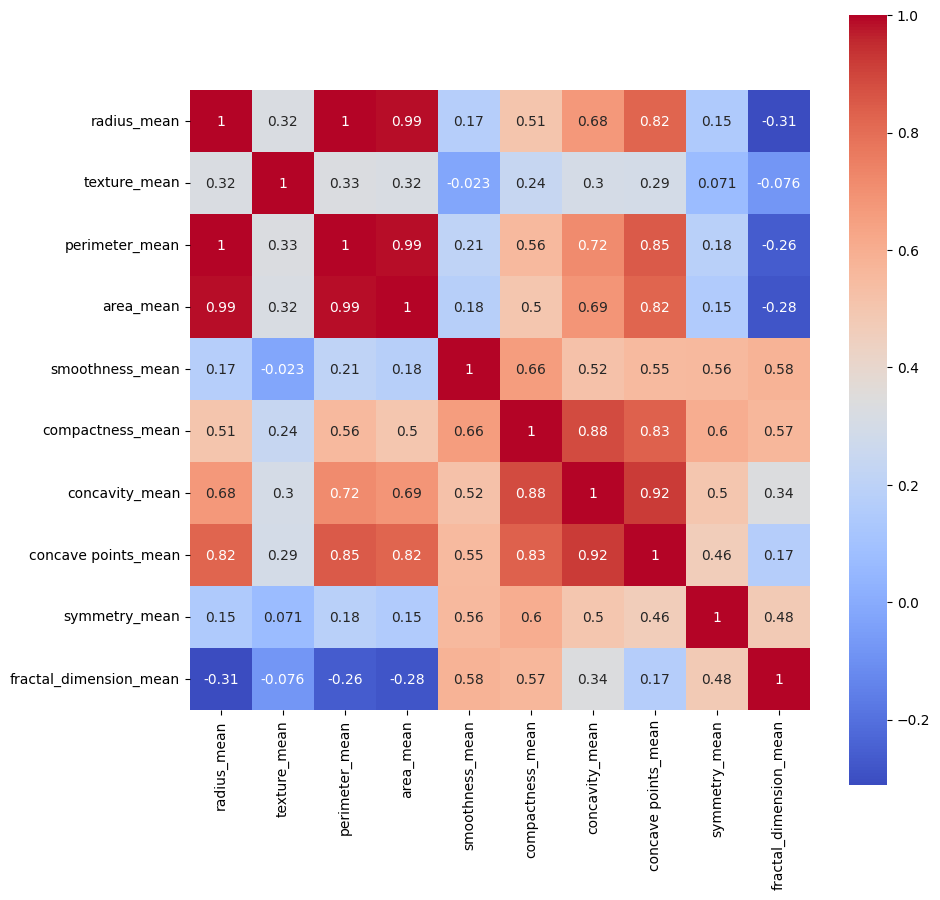

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

It is also possible to create a scatter matrix with the features. The red dots correspond to malignant diagnosis and blue to benign. Look how in some cases reds and blues dots occupies different regions of the plots.

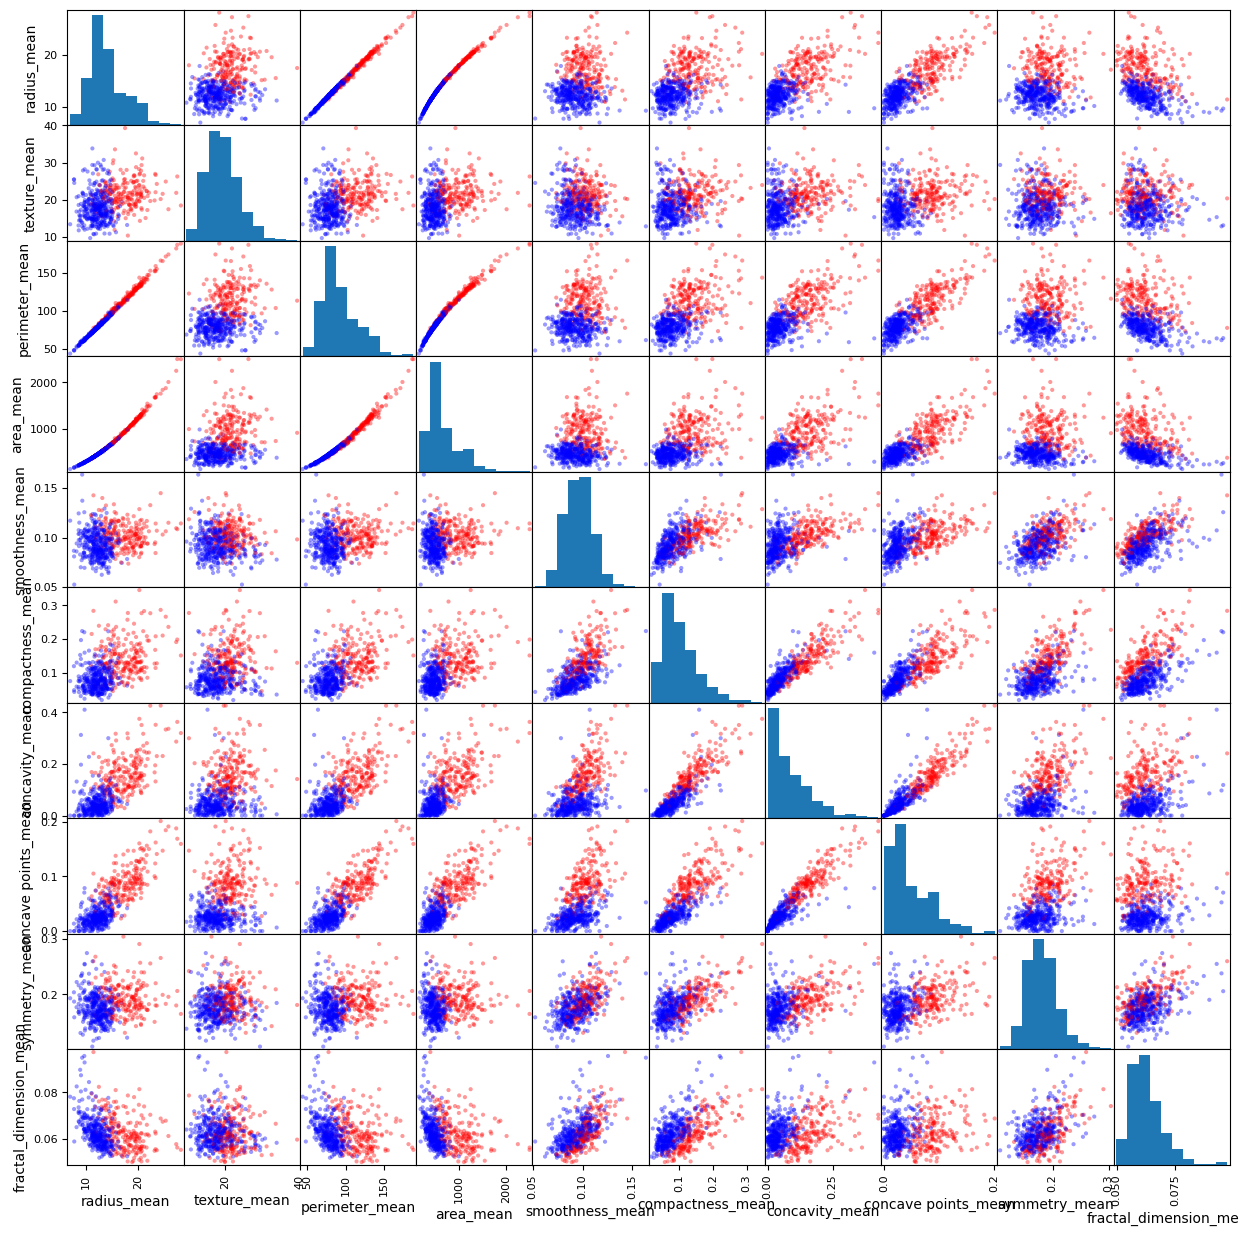

In [7]:
color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis'].map(lambda x: color_dic.get(x))
from pandas.plotting import scatter_matrix



sm = scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

We can also see how the malignant or benign tumors cells can have (or not) different values for the features plotting the distribution of each type of diagnosis for each of the mean features.

<ipython-input-8-5f5a08a0c6e8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
<ipython-input-8-5f5a08a0c6e8>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue

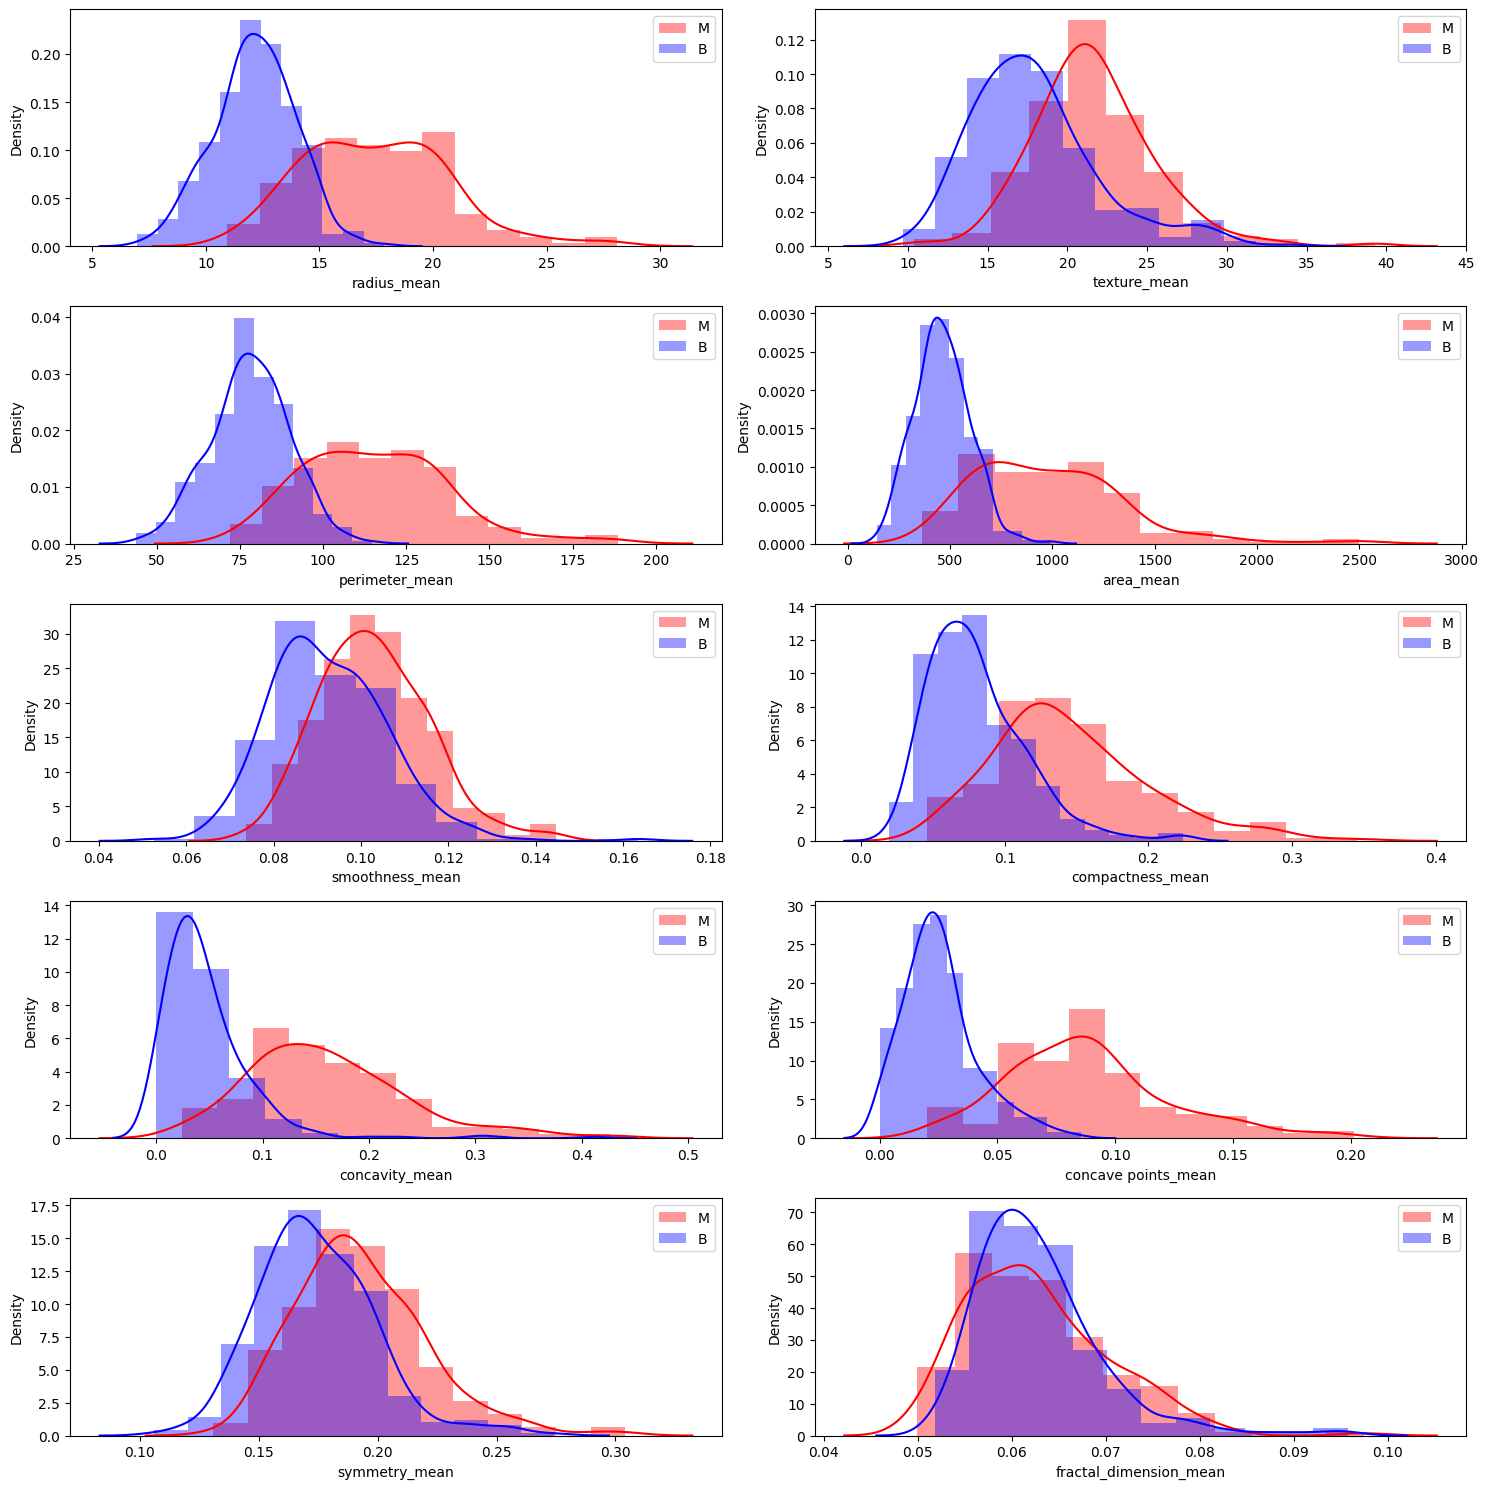

In [8]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)

    plt.subplot(rows, 2, i+1)

    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');

    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Still another form of doing this could be using box plots, which is done below.

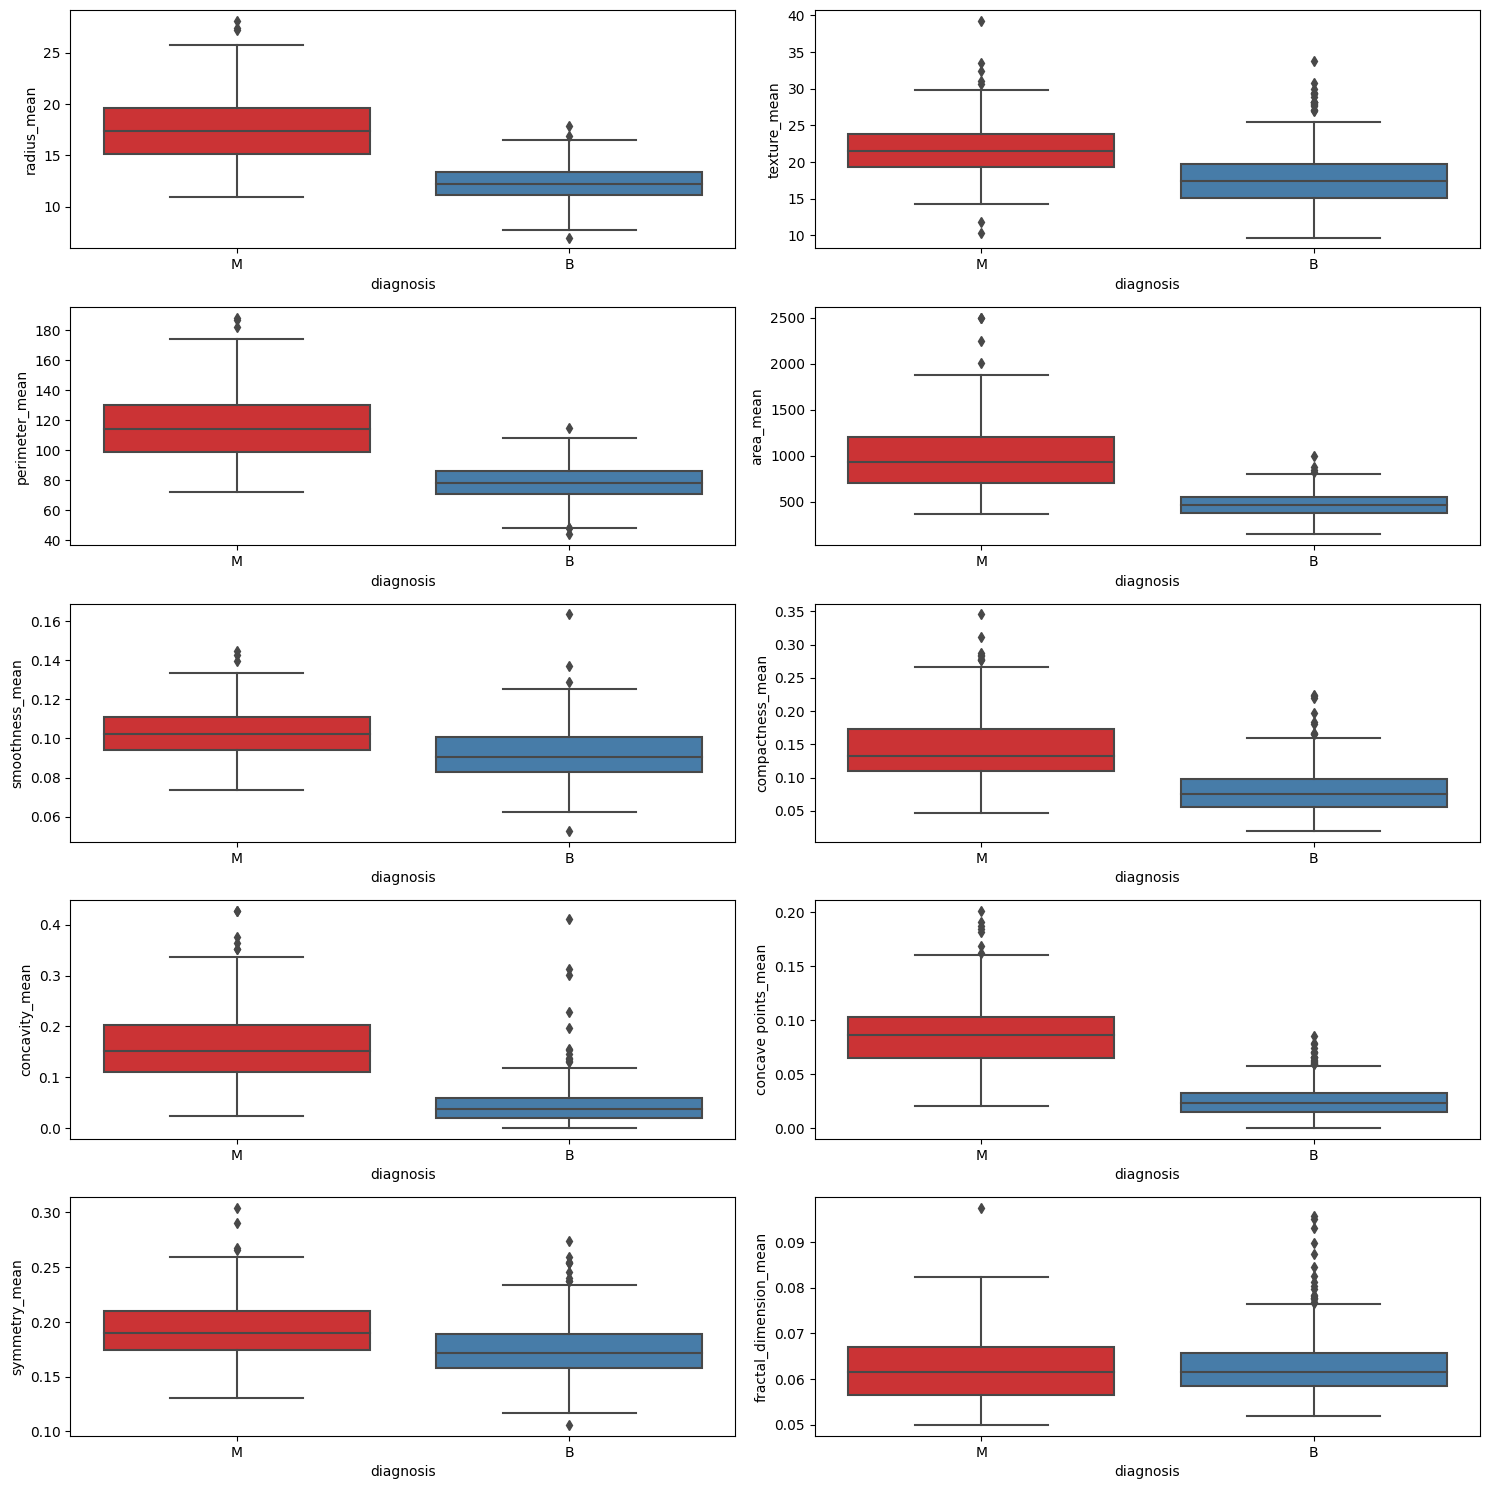

In [9]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)

    plt.subplot(rows, 2, i+1)

    sns.boxplot(x='diagnosis', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

As we saw above, some of the features can have, most of the times, values that will fall in some range depending on the diagnosis been malignant or benign. We will select those features to use in the next section.

In [10]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

# **4 - Machine learning**

 In this section we will test and analyze machine learning algorithms for classification in order to identify if the tumor is malignant or benign based on the cell features. For this we will use [Scikit-learn][1] package. The necessary tools will be loaded as needed.

The problem we are dealing with here is a classification problem. To choose the right estimator (algorithm) we used the [flowchart][2] found in the Scikit-learn web page.


  [1]: http://scikit-learn.org/stable/
  [2]: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

The algorithms will process only numerical values. For this reason, we will transform the categories M and B into values 1 and 0, respectively.

In [12]:
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

## **4.1 - Using all mean values features**

Our aim is to construct a "function" y = f(X) such that the value of y (1 or 0) will be determined once we input the values X into f. The "function" f will be construct by the machine learning algorithm based on the ys and Xs that are already known.

After training our machine learning algorithm we need to test its accuracy. In order to avoid [Overfitting][1] we will use the function `train_test_split` to split the data randomly (`random_state = 42`) into a train and a test set. The test set will correspond to 20% of the total data (`test_size = 0.2`).


  [1]: https://en.wikipedia.org/wiki/Overfitting

In [13]:
X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

Next we will use nine different classifiers, all with standard parameters. In all cases, the procedure will be the following:

1. the classifier `clf` is initialized;
2. the classifier `clf` is fitted with the train data set `X_train` and `y_train`;
3. the predictions are found using `X_test`;
4. the accuracy is estimated with help of [cross-validation][1];
5. the [accuracy][2] of the predictions is measured.

At the end the results are presents in %, along with the total time needed to run all the process.


  [1]: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
  [2]: http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

### **4.1.1 - Stochastic Gradient Descent**

The first classifier is the [Stochastic Gradient Descent][1].


  [1]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [14]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 89.47%
Cross validation score: 75.74% (+/- 16.90%)
Execution time: 0.040334 seconds 



### 4.1.2 - **Support Vector Machines**

Now we will use three different [Support Vector Machines][1] classifiers.


  [1]: http://scikit-learn.org/stable/modules/svm.html

In [15]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SVC Accuracy: 92.11%
Cross validation score: 88.58% (+/- 9.52%)
Execution time: 0.069658 seconds 

NuSVC Accuracy: 92.11%
Cross validation score: 85.24% (+/- 9.47%)
Execution time: 0.080656 seconds 

LinearSVC Accuracy: 85.96%
Cross validation score: 80.86% (+/- 11.33%)
Execution time: 0.16389 seconds 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

### **4.1.3 - Nearest Neighbors**

The nearest neighbors classifier finds predefined number of training samples closest in distance to the new point, and predict the label from these.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 93.86%
Cross validation score: 88.58% (+/- 7.10%)
Execution time: 0.067254 seconds 



### 4.1.3 - **Naive Bayes**

The Naive Bayes algorithm applies Bayes’ theorem with the assumption of independence between every pair of features.

In [17]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 94.74%
Cross validation score: 91.39% (+/- 5.13%)
Execution time: 0.029084 seconds 



###  **4.1.4 - Forest and tree methods**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Accuracy: 94.74%
Cross validation score: 95.08% (+/- 6.03%)
Execution time: 1.2865 seconds 

Extra Trees Accuracy: 95.61%
Cross validation score: 93.85% (+/- 4.43%)
Execution time: 0.84469 seconds 

Dedicion Tree Accuracy: 93.86%
Cross validation score: 90.34% (+/- 6.64%)
Execution time: 0.039999 seconds 



## **4.2 - Using the selected features**

In this section we will apply the same classifiers for the data with the features that were previously selected based on the analysis of section 3. To remember, those features are: radius_mean, perimeter_mean, area_mean, concavity_mean, concave points_mean.

In the end we will compare the accuracy the cross validation score for the selected set and the complete set of features.

In [19]:
X = data.loc[:,features_selection]
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

### **4.2.1 - Stochastic Gradient Descent**

In [20]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SGD Classifier Accuracy: 84.21%
Cross validation score: 80.86% (+/- 15.15%)
Execution time: 0.038144 seconds 



### **4.2.2 - Support Vector Machines**

In [21]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = NuSVC()
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SVC Accuracy: 92.11%
Cross validation score: 88.58% (+/- 9.52%)
Execution time: 0.055341 seconds 

NuSVC Accuracy: 92.11%
Cross validation score: 85.42% (+/- 8.95%)
Execution time: 0.073521 seconds 

LinearSVC Accuracy: 77.19%
Cross validation score: 84.19% (+/- 9.45%)
Execution time: 0.14964 seconds 



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

### **4.2.3 - Nearest Neighbors**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

Accuracy: 92.11%
Cross validation score: 88.23% (+/- 7.06%)
Execution time: 0.072381 seconds 



### **4.2.4 - Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

Accuracy: 94.74%
Cross validation score: 90.87% (+/- 5.91%)
Execution time: 0.030051 seconds 



### **4.2.5 - Forest and tree methods**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

Random Forest Accuracy: 93.86%
Cross validation score: 92.10% (+/- 6.55%)
Execution time: 1.1896 seconds 

Extra Trees Accuracy: 93.86%
Cross validation score: 91.74% (+/- 5.02%)
Execution time: 0.80018 seconds 

Dedicion Tree Accuracy: 93.86%
Cross validation score: 90.86% (+/- 4.92%)
Execution time: 0.038272 seconds 



In [25]:
diff_accuracy = list(np.array(accuracy_selection) - np.array(accuracy_all))
diff_cvs = list(np.array(cvs_selection) - np.array(cvs_all))

d = {'accuracy_all':accuracy_all, 'accuracy_selection':accuracy_selection, 'diff_accuracy':diff_accuracy,
     'cvs_all':cvs_all, 'cvs_selection':cvs_selection, 'diff_cvs':diff_cvs,}

index = ['SGD', 'SVC', 'NuSVC', 'LinearSVC', 'KNeighbors', 'GaussianNB', 'RandomForest', 'ExtraTrees', 'DecisionTree']

df = pd.DataFrame(d, index=index)

In [26]:
df

,accuracy_all,accuracy_selection,diff_accuracy,cvs_all,cvs_selection,diff_cvs
SGD,0.894737,0.842105,-0.052632,0.757444,0.808570,0.051126
SVC,0.921053,0.921053,0.000000,0.885841,0.885841,0.000000
NuSVC,0.921053,0.921053,0.000000,0.852445,0.854200,0.001754
LinearSVC,0.859649,0.771930,-0.087719,0.808601,0.841872,0.033271
KNeighbors,0.938596,0.921053,-0.017544,0.885779,0.882270,-0.003509
GaussianNB,0.947368,0.947368,0.000000,0.913895,0.908663,-0.005232
RandomForest,0.947368,0.938596,-0.008772,0.950831,0.920975,-0.029856
ExtraTrees,0.956140,0.938596,-0.017544,0.938503,0.917435,-0.021068
DecisionTree,0.938596,0.938596,0.000000,0.903385,0.908601,0.005217


As can be seen in the table above, using only some of the mean features reduced, in most of the cases, both accuracy and cross-validation scores.

# **5 - Improving the best model**

Not all parameters of a classifier is learned from the estimators. Those parameters are called hyper-parameters and are passed as arguments to the constructor of the classifier. Each estimator has a different set of hyper-parameters, which can be found in the corresponding documentation.

We can search for the best performance of the classifier sampling different hyper-parameter combinations. This will be done with an [exhaustive grid search][1], provided by the GridSearchCV function.

The grid search will be done only on the best models, which are Naive Bayes, Random Forest, Extra Trees and Decision Trees.

After running the piece of codes below, it will be presented the accuracy, the cross-validation score and the best set of parameters.  


  [1]: http://scikit-learn.org/stable/modules/grid_search.html#grid-search

In [27]:
from sklearn.model_selection import GridSearchCV

X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
csv_all = []

## **5.1 - Naive Bayes**

In [28]:
start = time.time()

parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

clf = GridSearchCV(GaussianNB(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

print("Best parameters: {0}".format(clf.best_params_))

Accuracy: 92.98%
Cross validation score: 95.44% (+/- 9.17%)
Execution time: 3.5136 seconds 

Best parameters: {'priors': [0.01, 0.99]}


## **5.2 - Forest and tree methods**

In [29]:
start = time.time()

parameters = {'n_estimators':list(range(1,101)), 'criterion':['gini', 'entropy']}

clf = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

start = time.time()

clf = GridSearchCV(ExtraTreesClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

start = time.time()

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

Random Forest Accuracy: 95.61%
Cross validation score: 97.74% (+/- 2.76%)
Execution time: 571.66 seconds 

Best parameters: {'criterion': 'entropy', 'n_estimators': 73} 

Extra Trees Accuracy: 95.61%
Cross validation score: 97.55% (+/- 2.59%)
Execution time: 389.75 seconds 

Best parameters: {'criterion': 'entropy', 'n_estimators': 44} 

Dedicion Tree Accuracy: 91.23%
Cross validation score: 82.06% (+/- 9.73%)
Execution time: 0.74852 seconds 

Best parameters: {'criterion': 'gini', 'splitter': 'best'} 



As can be seen, in one case (Extra Trees) both accuracy and cross-validations score were improved,  but only by some few percents and with the cost of more computational resources and time. In other cases only the accuracy or the cross-validation score could be improved.